# CH EN 3553 

## Odeint help

In [1]:
#imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Simple ODE Example

ODE/Model:

$$ \Large \frac{dy}{dt} = -\alpha y$$

Initial Condition:

$$ \Large y_{0} = 20 ft$$

For example, a tank height (y) that decreases following the model above with an inital 20 ft of water.

In [2]:
y0 = 20 #initial condition
α = 0.5 #constant

#create ode function returning the ODE model
def ode(y,t):
    dydt = -α*y
    return dydt

t = np.linspace(0,5,10) #create t array of discrete points for odeint to evaluate y(t)

y = odeint(ode,y0,t) #odeint("python function for model","initial condition for model","discrete values over which to solve the ode")

In [3]:
print(y)

[[20.        ]
 [15.14930259]
 [11.47506874]
 [ 8.69196438]
 [ 6.58385995]
 [ 4.98704431]
 [ 3.77751211]
 [ 2.86133366]
 [ 2.16736044]
 [ 1.64169994]]


odeint returns a list containing discrete y values for each value of t provided.

Text(0.5,0,'t (hrs)')

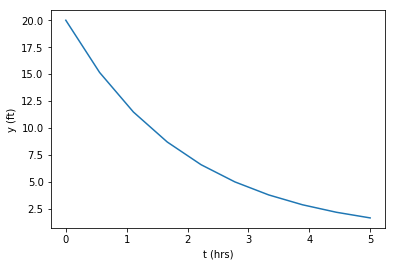

In [4]:
plt.plot(t,y)
plt.ylabel('y (ft)')
plt.xlabel('t (hrs)')

If we wanted the height after 5 hours (the final value), we could do the following.

In [5]:
y5 = y[-1]
print("The tank height is {} ft after 5 hours".format(y5))

The tank height is [1.64169994] ft after 5 hours


In [6]:
#y[-1] is technically a list of 1 value so we can get rid of the brackets in the print statement by printing the 1st value in y[-1]
y5 = y[-1][0]
print("The tank height is {} ft after 5 hours".format(y5))

The tank height is 1.6416999434549835 ft after 5 hours


## System of ODEs Example

The following models were made arbitrarily for example purposes.

ODEs/Models:

$$ \Large \frac{dy}{dt} = -a y - zxy$$

$$ \Large \frac{dx}{dt} = -b xy + a y^{2}xt $$

$$ \Large \frac{dz}{dt} = -b xyz + 5a yx^{2}t^{2} $$

Initial Conditions:

$$ \Large x_{0} = 0.5$$

$$ \Large y_{0} = 10$$

$$ \Large z_{0} = 5$$

In [7]:
x0 = 0.5 #inital x
y0 = 10 #inital y
z0 = 5 #initial z
Initials = [x0,y0,z0] #array of inital values to pass to odes function
a = 0.25 #constant
b = 2 #constant

def odes(I,t):
    x = I[0] #initial x
    y = I[1] #initial y
    z = I[2] #initial z
    #ode models
    dxdt = -b*x*y + a*x*t*y**2 
    dydt = -a*y-x*y*z
    dzdt = -b*x*y*z + 5*a*y*x**2 *t**2
    return [dxdt,dydt,dzdt] #return models

t = np.linspace(0,5,10) #create t array of discrete points for odeint to evaluate y(t)
odesol = odeint(odes,Initials,t)
print(odesol)

[[5.00000000e-01 1.00000000e+01 5.00000000e+00]
 [5.52447963e-04 7.78700634e+00 2.92324694e+00]
 [7.14172762e-05 6.77525067e+00 2.91890927e+00]
 [1.34205336e-04 5.89585421e+00 2.91717671e+00]
 [1.01571630e-03 5.12793222e+00 2.91010113e+00]
 [1.35013733e-02 4.42922779e+00 2.84043274e+00]
 [1.46840527e-01 3.54436459e+00 2.32383447e+00]
 [3.89774242e-01 2.13687390e+00 2.56161763e+00]
 [2.84754023e-01 1.05576869e+00 3.11914879e+00]
 [1.79082707e-01 6.19065941e-01 3.13052681e+00]]


In systems of ODEs, if odeint is formatted in this way, the ode solution will be a list of x, y, and z values at every time step.

In [11]:
# find final values of x, y, and z
odefinal = odesol[-1]
print(odefinal)
xfin = odefinal[0]
yfin = odefinal[1]
zfin = odefinal[2]
print("The final value of x is {}".format(xfin))
print("The final value of y is {}".format(yfin))
print("The final value of z is {}".format(zfin))

[0.17908271 0.61906594 3.13052681]
The final value of x is 0.17908270657993788
The final value of y is 0.6190659407055759
The final value of z is 3.1305268124422647


In [9]:
#splicing odesol list to create lists of x, y, and z 
x = odesol[:,0]
y = odesol[:,1]
z = odesol[:,2]
print(x)

[5.00000000e-01 5.52447963e-04 7.14172762e-05 1.34205336e-04
 1.01571630e-03 1.35013733e-02 1.46840527e-01 3.89774242e-01
 2.84754023e-01 1.79082707e-01]


Text(0.5,0,'t (hrs)')

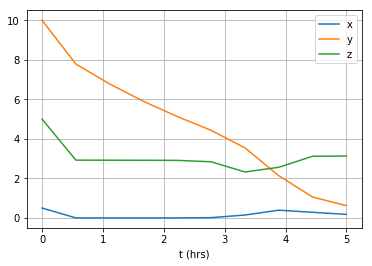

In [10]:
#visualization of models
plt.plot(t,x,label="x")
plt.plot(t,y,label='y')
plt.plot(t,z,label='z')
plt.legend()
plt.grid()
plt.xlabel("t (hrs)")